In [8]:
%matplotlib inline
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [3]:
def quantize(step:int, sequence):
    quants = dict()
    count=0
    a=0
    result=[]
    while a<255:
        quants.update({count:(a, a+step if a+step<=255 else 255)})
        a+=step
        count+=1
    for i in sequence:
        for j in quants.keys():
            if i in range(quants[j][0], quants[j][1]):
                result.append(j)
                break

    return quants,result
quantize(6, [1,2,3,4,5])

({0: (0, 6),
  1: (6, 12),
  2: (12, 18),
  3: (18, 24),
  4: (24, 30),
  5: (30, 36),
  6: (36, 42),
  7: (42, 48),
  8: (48, 54),
  9: (54, 60),
  10: (60, 66),
  11: (66, 72),
  12: (72, 78),
  13: (78, 84),
  14: (84, 90),
  15: (90, 96),
  16: (96, 102),
  17: (102, 108),
  18: (108, 114),
  19: (114, 120),
  20: (120, 126),
  21: (126, 132),
  22: (132, 138),
  23: (138, 144),
  24: (144, 150),
  25: (150, 156),
  26: (156, 162),
  27: (162, 168),
  28: (168, 174),
  29: (174, 180),
  30: (180, 186),
  31: (186, 192),
  32: (192, 198),
  33: (198, 204),
  34: (204, 210),
  35: (210, 216),
  36: (216, 222),
  37: (222, 228),
  38: (228, 234),
  39: (234, 240),
  40: (240, 246),
  41: (246, 252),
  42: (252, 255)},
 [0, 0, 0, 0, 0])

In [5]:
0.5 in range (0,2)

False

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (601,) + inhomogeneous part.

<Figure size 640x480 with 0 Axes>

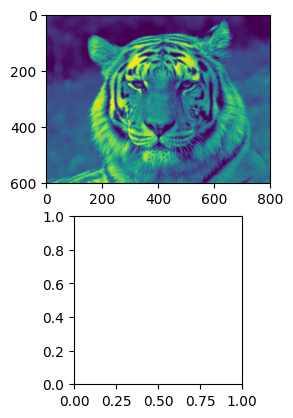

In [15]:
def create_ranges(boundary:int, step):
    quants = dict()
    count=0
    a=0

    while a<255:
        quants.update({count:(a, a+step if a+step<=boundary else boundary)})
        a+=step
        count+=1
    return quants

def quantize(step:int, sequence):
    result=[]
    quants = create_ranges(255, step)
    for row in range(len(sequence)):
        new_row=[]
        for col in range(len(sequence[row])):
            for j in quants.keys():
                if quants[j][0]<sequence[row][col] and sequence[row][col]<=quants[j][1]:
                    new_row.append(j)
                    break
        result.append(new_row)

    return result


def restore(step:int, sequence):
    result=[]
    quants = create_ranges(255, step)
    appr = dict()
    for i in quants.keys():
        appr.update({i:(quants[i][0]+quants[i][1])/2})
    for row in range(len(sequence)):
        new_row=[]
        for col in range(len(sequence[row])):
            new_row.append(appr[sequence[row][col]])
        result.append(new_row)
    return result

#restore(4, [[17],[18],[18]])
#quantize(4, [[71], [73], [74]])
img = imread('tiger-color.png')
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]
y = 0.299 * r + 0.587 * g + 0.114 * b
y_copy = y.copy()
plt.figure()
f, ax = plt.subplots(2,1)
ax[0].imshow(y)
ax[1].imshow(quantize(4,y_copy))